In [2]:
import numpy as np
import pandas as pd

In [98]:
def process(filename, sheet_name = 0):
    data = pd.read_excel(filename, sheet_name = sheet_name)
    data['time'] = pd.to_datetime(data['time'])

    bins = pd.date_range(start=data['time'][0], end='2021-08-23 19:49:00.000', freq='10S')
    labels = [i for i in range(len(bins) - 1)]
    data['time_group'] = pd.cut(data['time'], bins=bins, right=False, labels=labels)
    data['time'] = data['time'].apply(lambda x : str(x).split(":")[-1])

    category = pd.DataFrame.groupby(data, by=data['time_group'])
    length = len(category)
    Bigdata = np.full((length, 500, 8), np.nan)
    labels = np.full((length,), np.nan)
    for i in range(0, length):
        length = category.get_group(i).values.shape[0]
        Bigdata[i,0:length,:] = category.get_group(i).drop(columns=['time_group']).values
        labels[i] = (i % 6)
    return Bigdata, labels

In [99]:
X, y = process('z10.xlsx', sheet_name='z11')
#np.savez('z8.npz', X = X, y = y)

In [100]:
np.unique(y, return_counts=True)

(array([0., 1., 2., 3., 4., 5.]), array([5, 5, 5, 5, 5, 5], dtype=int64))

array([], shape=(0, 1), dtype=int64)

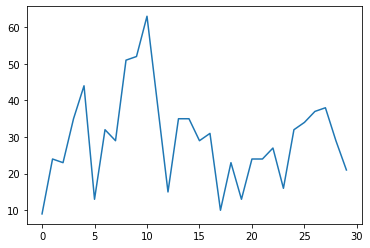

In [102]:
import matplotlib.pyplot as plt
num = np.isnan(X).all(axis=2).astype(np.int32).sum(axis=1)
plt.plot(range(30), num)
np.argwhere(num> 100)

In [103]:
np.savez('z11.npz', X = X.astype(np.float32), y = y.astype(np.int32))

In [3]:
files = ['z8.npz', 'z9.npz', 'z10.npz', 'z11.npz', 'zj.npz']
X = [np.load(i)['X'] for i in files]
y = [np.load(i)['y'] for i in files]

In [4]:
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

In [5]:
X.shape

(477, 500, 8)

In [6]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 51,  51,  51,  51,  51, 222], dtype=int64))

In [8]:
X.dtype, y.dtype

(dtype('float32'), dtype('int32'))

In [9]:
np.savez('zj.npz', X=X, y=y)